In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn import linear_model
from pathlib import Path  

In [2]:
unemp = pd.read_csv('data/cleaned/annual/unemployment_perc.csv')
population = pd.read_csv('data/cleaned/annual/totpop.csv')
permits = pd.read_csv('data/cleaned/annual/totpermits.csv')
mdsp = pd.read_csv('data/cleaned/annual/totdispinc.csv')
pph = pd.read_csv('data/cleaned/annual/pph.csv')
mortgage = pd.read_csv('data/cleaned/annual/mortgage_rate.csv')
income = pd.read_csv('data/cleaned/annual/income.csv')
foreclosure = pd.read_csv('data/cleaned/annual/foreclosures.csv')
exhs = pd.read_csv('data/cleaned/annual/existinghomessold.csv')

In [3]:
df = pd.read_excel('3_combined.xlsx')

In [4]:
df.set_index('DATE', inplace=True)

In [5]:
df.index = pd.to_datetime(df.index)

In [6]:
df.isna()

,Income,Foreclosures,Population,Existing Homes Sold,Tot Permits Issued,Single Family Units Sold,Unemployment,MDSP,Family Size,Mortgage,CSUSHPISA
DATE,,,,,,,,,,,
2000-12-31,True,True,True,True,True,True,True,True,False,True,True
2001-12-31,False,True,True,True,True,True,True,False,False,True,False
2002-12-31,False,True,False,True,False,False,False,False,False,False,False
2003-12-31,False,True,False,True,False,False,False,False,False,False,False
2004-12-31,False,True,False,True,False,False,False,False,False,False,False
2005-12-31,False,False,False,False,False,False,False,False,False,False,False
2006-12-31,False,False,False,False,False,False,False,False,False,False,False
2007-12-31,False,False,False,False,False,False,False,False,False,False,False
2008-12-31,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.describe()

,Income,Foreclosures,Population,Existing Homes Sold,Tot Permits Issued,Single Family Units Sold,Unemployment,MDSP,Family Size,Mortgage,CSUSHPISA
count,20.000000,1.600000e+01,2.100000e+01,17.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,61845.550000,1.299518e+06,3.135037e+08,5.227059,923.710238,689.629405,6.018214,5.371230,2.007581,4.682421,169.057500
std,3079.320781,8.291471e+05,1.477584e+07,0.819236,394.858949,296.473608,1.825714,1.081910,0.012948,1.138271,35.129477
min,57623.000000,2.143230e+05,2.882944e+08,4.120000,420.000000,306.415000,3.675000,3.703333,1.987530,2.957500,113.178083
25%,60060.000000,6.635895e+05,3.016962e+08,4.660000,619.082500,440.252500,4.617500,4.405000,1.998030,3.847500,144.672167
50%,61371.500000,1.100499e+06,3.147254e+08,5.250000,853.747500,615.915000,5.540000,5.587500,2.009220,4.447500,164.704917
75%,63069.500000,1.849420e+06,3.268597e+08,5.510000,1213.000000,827.582500,7.355000,6.135000,2.015690,5.835000,183.447417
max,69560.000000,2.871891e+06,3.326840e+08,7.080000,1684.497500,1278.915000,9.607500,7.065000,2.030240,6.412500,260.017750


In [8]:
df.corr()

,Income,Foreclosures,Population,Existing Homes Sold,Tot Permits Issued,Single Family Units Sold,Unemployment,MDSP,Family Size,Mortgage,CSUSHPISA
Income,1.000000,-0.698442,0.485274,0.432103,0.250276,0.299982,-0.581412,-0.477037,0.369425,-0.225965,0.762845
Foreclosures,-0.698442,1.000000,-0.425603,-0.794000,-0.693602,-0.672975,0.697571,0.565622,-0.110197,0.214746,-0.809677
Population,0.485274,-0.425603,1.000000,0.018515,-0.418808,-0.457651,-0.156868,-0.834316,0.872194,-0.902568,0.709114
Existing Homes Sold,0.432103,-0.794000,0.018515,1.000000,0.945741,0.909625,-0.576731,-0.209040,-0.168795,0.041261,0.570911
Tot Permits Issued,0.250276,-0.693602,-0.418808,0.945741,1.000000,0.989557,-0.524214,0.145167,-0.573798,0.429253,0.099615
Single Family Units Sold,0.299982,-0.672975,-0.457651,0.909625,0.989557,1.000000,-0.495349,0.187323,-0.553975,0.479102,0.102852
Unemployment,-0.581412,0.697571,-0.156868,-0.576731,-0.524214,-0.495349,1.000000,0.204826,0.133170,-0.110849,-0.442116
MDSP,-0.477037,0.565622,-0.834316,-0.209040,0.145167,0.187323,0.204826,1.000000,-0.611155,0.862017,-0.577201
Family Size,0.369425,-0.110197,0.872194,-0.168795,-0.573798,-0.553975,0.133170,-0.611155,1.000000,-0.765813,0.668098
Mortgage,-0.225965,0.214746,-0.902568,0.041261,0.429253,0.479102,-0.110849,0.862017,-0.765813,1.000000,-0.509490


In [9]:
corr = df.corr()

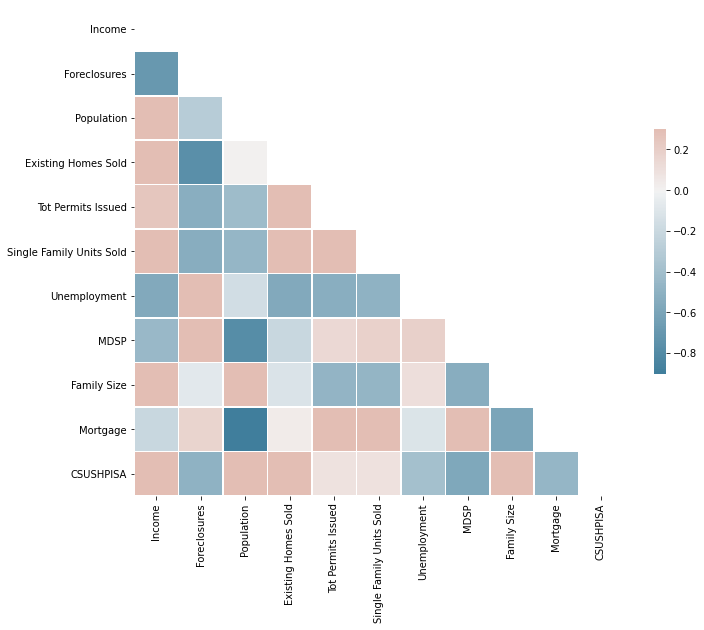

In [33]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
fig = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [34]:
plt.savefig('corr_dia.png')

<Figure size 432x288 with 0 Axes>

In [21]:
corr_inf = pd.DataFrame(corr.CSUSHPISA)

In [22]:
data = corr_inf

In [23]:
data

,CSUSHPISA
Income,0.614087
Foreclosures,-0.495220
Population,0.625292
Existing Homes Sold,0.464431
Tot Permits Issued,0.088533
Single Family Units Sold,0.093928
Unemployment,-0.393884
MDSP,-0.577201
Family Size,0.504015
Mortgage,-0.459265


<AxesSubplot:>

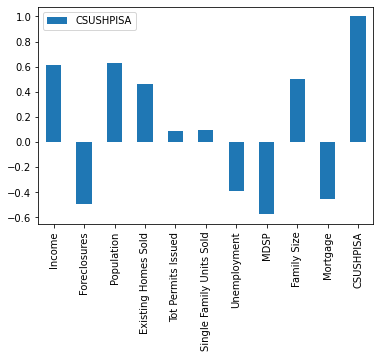

In [24]:
data.plot.bar()

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Income to CSUSHPISA
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CSUSHPISA  11 non-null     float64
dtypes: float64(1)
memory usage: 476.0+ bytes


In [37]:
data = data.head(10)

<AxesSubplot:>

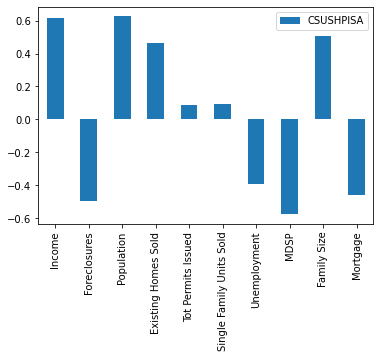

In [39]:
data.plot.bar()

In [16]:
df=df.fillna(df.mean()) 

In [17]:
df.isna()

,Income,Foreclosures,Population,Existing Homes Sold,Tot Permits Issued,Single Family Units Sold,Unemployment,MDSP,Family Size,Mortgage,CSUSHPISA
DATE,,,,,,,,,,,
2000-12-31,False,False,False,False,False,False,False,False,False,False,False
2001-12-31,False,False,False,False,False,False,False,False,False,False,False
2002-12-31,False,False,False,False,False,False,False,False,False,False,False
2003-12-31,False,False,False,False,False,False,False,False,False,False,False
2004-12-31,False,False,False,False,False,False,False,False,False,False,False
2005-12-31,False,False,False,False,False,False,False,False,False,False,False
2006-12-31,False,False,False,False,False,False,False,False,False,False,False
2007-12-31,False,False,False,False,False,False,False,False,False,False,False
2008-12-31,False,False,False,False,False,False,False,False,False,False,False


In [19]:
corr = df.corr()

In [29]:
df.describe()

,Income,Foreclosures,Population,Existing Homes Sold,Tot Permits Issued,Single Family Units Sold,Unemployment,MDSP,Family Size,Mortgage,CSUSHPISA
count,23.00000,2.300000e+01,2.300000e+01,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,61845.55000,1.299518e+06,3.135037e+08,5.227059,923.710238,689.629405,6.018214,5.371230,2.007581,4.682421,169.057500
std,2861.67555,6.846457e+05,1.408821e+07,0.698647,376.483236,282.676494,1.740750,1.031560,0.012345,1.085299,33.494642
min,57623.00000,2.143230e+05,2.882944e+08,4.120000,420.000000,306.415000,3.675000,3.703333,1.987530,2.957500,113.178083
25%,60412.00000,8.252835e+05,3.031196e+08,4.980000,629.457500,461.208750,4.746250,4.437500,1.998345,3.891250,146.607500
50%,61748.00000,1.299518e+06,3.135037e+08,5.227059,863.500000,683.167500,5.800000,5.371230,2.007581,4.542500,169.057500
75%,62449.00000,1.330657e+06,3.257345e+08,5.395000,1164.916250,814.291250,6.757500,6.032500,2.015395,5.830000,182.194500
max,69560.00000,2.871891e+06,3.326840e+08,7.080000,1684.497500,1278.915000,9.607500,7.065000,2.030240,6.412500,260.017750


In [32]:
filepath = Path('finalcombined.csv')  
df.to_csv(filepath, index=True)

In [41]:
for each in data.CSUSHPISA:
    if each<0:
        each*=-1
    else:
        continue

In [46]:
data = abs(data)

In [47]:
data

,CSUSHPISA
Income,0.614087
Foreclosures,0.495220
Population,0.625292
Existing Homes Sold,0.464431
Tot Permits Issued,0.088533
Single Family Units Sold,0.093928
Unemployment,0.393884
MDSP,0.577201
Family Size,0.504015
Mortgage,0.459265


In [51]:
sorted_data = data.sort_values(by=['CSUSHPISA'], ascending=False)

In [56]:
sorted_data


,CSUSHPISA
Population,0.625292
Income,0.614087
MDSP,0.577201
Family Size,0.504015
Foreclosures,0.495220
Existing Homes Sold,0.464431
Mortgage,0.459265
Unemployment,0.393884
Single Family Units Sold,0.093928
Tot Permits Issued,0.088533


In [59]:
top_5 = sorted_data.head(5)

In [60]:
top_5

,CSUSHPISA
Population,0.625292
Income,0.614087
MDSP,0.577201
Family Size,0.504015
Foreclosures,0.495220
